In [10]:
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array

# load doc into memory

def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# split a loaded document into sentences
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs
# clean a list of lines
def clean_pairs(lines):
	cleaned = list()
	table = str.maketrans('', '', string.punctuation)
	for pair in lines:
		clean_pair = list()
		for line in pair:
			line = line.split()
			line = [word.lower() for word in line]
			line = [word.translate(table) for word in line]
			line = [word for word in line if word.isalpha()]
			clean_pair.append(' '.join(line))
		cleaned.append(clean_pair)
	return array(cleaned)
# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
filename = '//kaggle/input/dataset/vie.txt'
doc = load_doc(filename)
# split into english-german pairs
pairs = to_pairs(doc)
# clean sentences
clean_pairs = clean_pairs(pairs)
# save clean pairs to file
save_clean_data(clean_pairs, 'english-vie.pkl')
# spot check
for i in range(200):
	print('[%s] => [%s]' % (clean_pairs[i,0], clean_pairs[i,1]))
	

Saved: english-vie.pkl
[run] => [chạy]
[help] => [giúp tôi với]
[go on] => [tiếp tục đi]
[hello] => [chào bạn]
[hurry] => [nhanh lên nào]
[eat it] => [ăn đi]
[eat it] => [ăn nó đi]
[help me] => [cứu tôi với]
[i agree] => [tôi cũng nghĩ như vậy]
[perfect] => [hoàn hảo]
[we know] => [chúng tôi biết]
[we know] => [chúng ta biết]
[you run] => [bạn chạy]
[cheer up] => [đừng có rầu rĩ quá như thế]
[he tries] => [hắn thử]
[he tries] => [anh thử]
[hurry up] => [thoáng cái chân lên]
[i forgot] => [tôi quên mất rồi]
[im bald] => [tôi bị hói]
[im busy] => [tôi đang bận]
[too late] => [muộn quá]
[i hate tv] => [tôi ghét ti vi]
[i laughed] => [tôi đã cười]
[i laughed] => [tôi cười]
[i will go] => [tôi sẽ đi]
[its cold] => [lạnh]
[its ours] => [đó là của chúng tôi]
[its ours] => [đó là của chúng ta]
[she cried] => [nó đã khóc]
[she cried] => [cô ấy đã khóc]
[sit there] => [hãy ngồi ở đó]
[whats up] => [gì thế]
[whats up] => [có chuyện gì]
[are you ok] => [bạn có sao không]
[find a job] => [hãy tìm m

In [11]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('english-vie.pkl')

# reduce dataset size
n_sentences = 6139
dataset = raw_dataset[:n_sentences, :]
# random shuffle
shuffle(dataset)
# split into train/test
train, test = dataset[:4500], dataset[4501:]
# save
save_clean_data(dataset, 'english-vie-both.pkl')
save_clean_data(train, 'english-vie-train.pkl')
save_clean_data(test, 'english-vie-test.pkl')
print(dataset)	

Saved: english-vie-both.pkl
Saved: english-vie-train.pkl
Saved: english-vie-test.pkl
[['buy cheap and waste your money' 'của rẻ là của ôi'
  'ccby france attribution tatoebaorg cm']
 ['i hope tom wont want to do that'
  'tôi mong là tom sẽ không muốn làm việc đó'
  'ccby france attribution tatoebaorg ck']
 ['it might explode' 'nó có thể nổ'
  'ccby france attribution tatoebaorg ck tucm']
 ...
 ['you dont drive very well' 'bạn lái xe không giỏi lắm'
  'ccby france attribution tatoebaorg ck']
 ['i want to know more about your school life'
  'tôi muốn biết thêm về cuộc sống học đường của bạn'
  'ccby france attribution tatoebaorg ck trieuho']
 ['tom and i were both in boston last week'
  'cả tom và tôi đã ở boston tuần trước'
  'ccby france attribution tatoebaorg ck duythanh']]


Tiếng Anh:
{1: 9, 2: 66, 3: 377, 4: 850, 5: 1127, 6: 1069, 7: 819, 8: 609, 9: 465, 10: 283, 11: 168, 12: 122, 13: 60, 14: 42, 15: 30, 16: 9, 17: 4, 18: 10, 19: 10, 20: 4, 21: 2, 22: 2, 23: 0, 24: 0, 25: 0}
Tiếng Việt:
{1: 3, 2: 19, 3: 107, 4: 346, 5: 634, 6: 867, 7: 891, 8: 799, 9: 642, 10: 537, 11: 421, 12: 256, 13: 180, 14: 129, 15: 86, 16: 59, 17: 54, 18: 29, 19: 15, 20: 17, 21: 10, 22: 9, 23: 8, 24: 8, 25: 5}


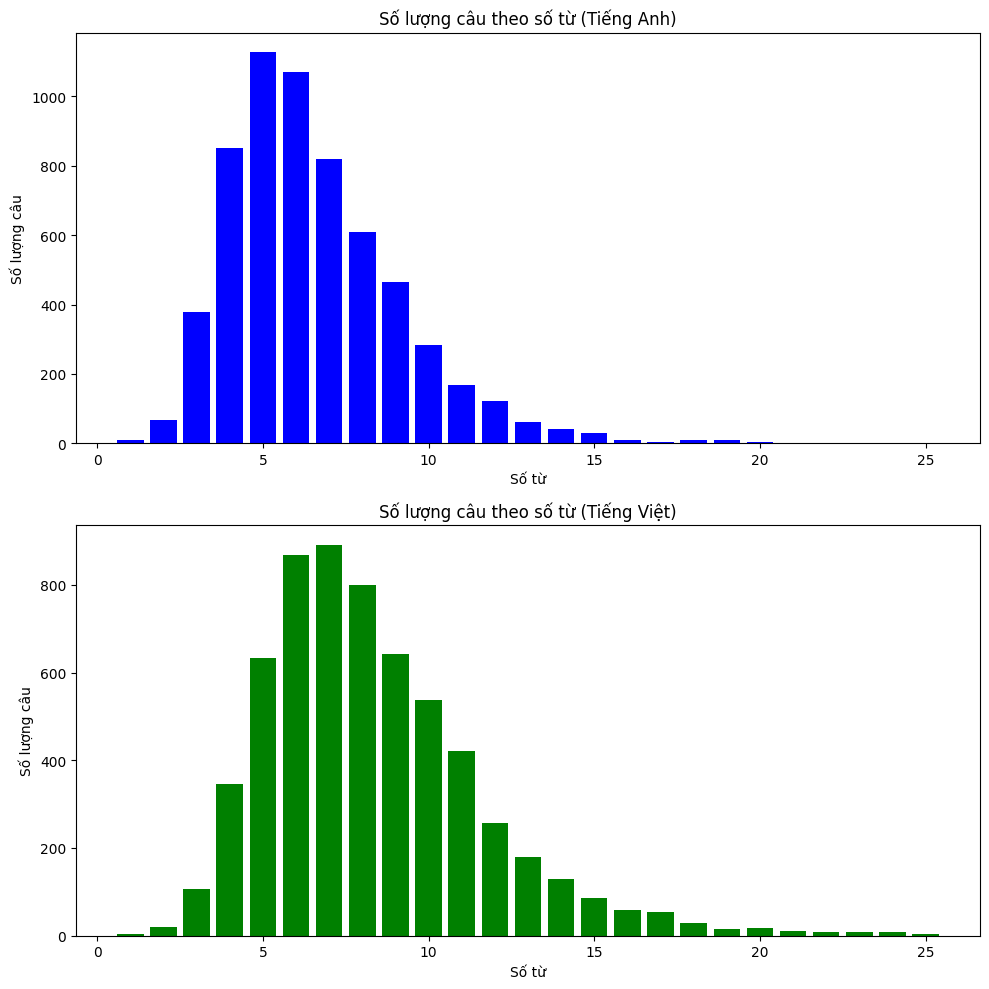

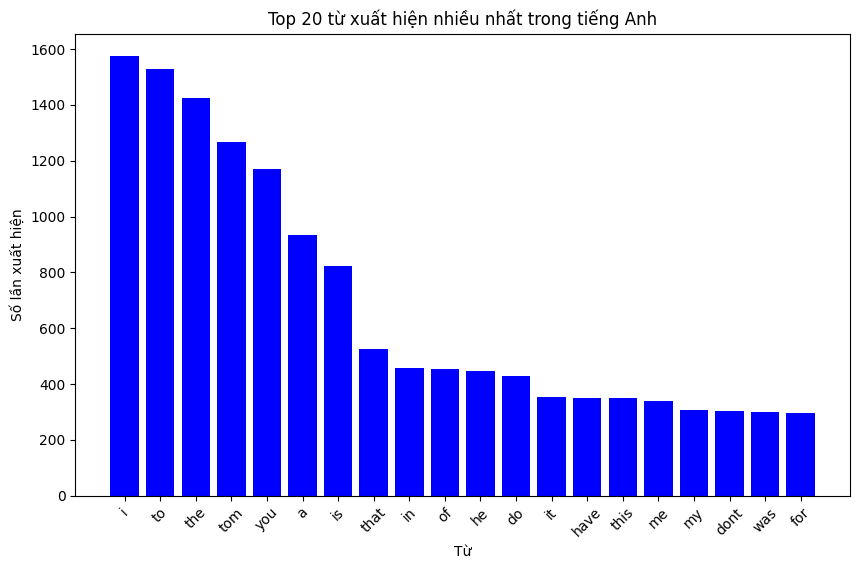

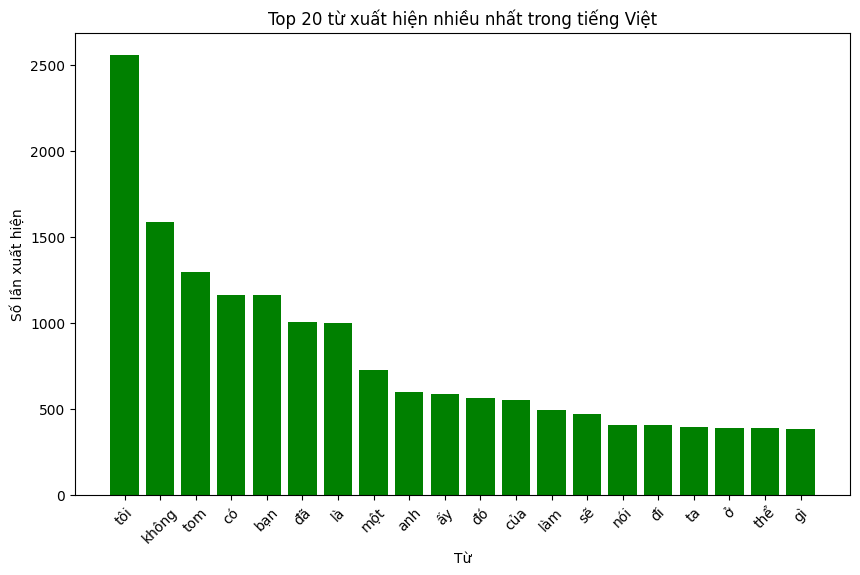

In [12]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import Counter
# Đường dẫn đến tệp .pkl
file_path = "english-vie.pkl"

# Tạo bộ đếm cho số câu tiếng Anh với các độ dài khác nhau
count_dict_english = {1: 0, 2: 0, 3: 0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}
count_dict_vie = {1: 0, 2: 0, 3: 0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}
# Đọc dữ liệu từ tệp .pkl
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Tách và đếm số chữ trong câu tiếng Anh
for pair in data:
    english_sentence = pair[0]  # Câu tiếng Anh nằm ở vị trí đầu tiên
    word_count = len(english_sentence.split())
    if word_count in count_dict_english:
        count_dict_english[word_count] += 1
for pair in data:
    vie_sentence = pair[1]  # Câu tiếng Viet nằm ở vị trí 2
    word_count = len(vie_sentence.split())
    if word_count in count_dict_vie:
        count_dict_vie[word_count] += 1

def count_words(data):
    eng_counter = Counter()
    vie_counter = Counter()
    for pair in data:
        english_sentence = pair[0]
        vie_sentence = pair[1]
        eng_counter.update(english_sentence.split())
        vie_counter.update(vie_sentence.split())
    return eng_counter, vie_counter

eng_counter, vie_counter = count_words(data)

# Lấy 20 từ xuất hiện nhiều nhất
top_20_eng = eng_counter.most_common(20)
top_20_vie = vie_counter.most_common(20)
# In số câu với số chữ khác nhau
print("Tiếng Anh:")
print(count_dict_english)
print("Tiếng Việt:")
print(count_dict_vie)
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Biểu đồ cho tiếng Anh
ax[0].bar(count_dict_english.keys(), count_dict_english.values(), color='blue')
ax[0].set_title('Số lượng câu theo số từ (Tiếng Anh)')
ax[0].set_xlabel('Số từ')
ax[0].set_ylabel('Số lượng câu')

# Biểu đồ cho tiếng Việt
ax[1].bar(count_dict_vie.keys(), count_dict_vie.values(), color='green')
ax[1].set_title('Số lượng câu theo số từ (Tiếng Việt)')
ax[1].set_xlabel('Số từ')
ax[1].set_ylabel('Số lượng câu')

plt.tight_layout()
plt.show()
# Vẽ biểu đồ cho 20 từ xuất hiện nhiều nhất trong tiếng Anh
def plot_top_words(top_words, title, color):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color=color)
    plt.xlabel('Từ')
    plt.ylabel('Số lần xuất hiện')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(top_20_eng, 'Top 20 từ xuất hiện nhiều nhất trong tiếng Anh', 'blue')
plot_top_words(top_20_vie, 'Top 20 từ xuất hiện nhiều nhất trong tiếng Việt', 'green')

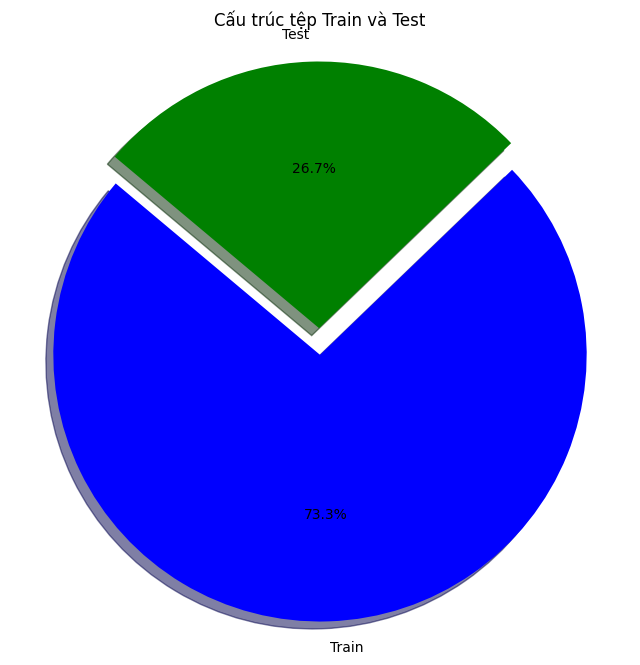

In [13]:
import pickle
import matplotlib.pyplot as plt

# Hàm để tải dữ liệu từ tệp
def load_clean_sentences(filename):
    return pickle.load(open(filename, 'rb'))

# Tải dữ liệu từ các tệp train và test
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')

# Đếm tổng số câu trong mỗi tệp
num_train_sentences = len(train)
num_test_sentences = len(test)
#Tính tỷ lệ phần trăm
total_sentences = num_train_sentences + num_test_sentences
train_percentage = (num_train_sentences / total_sentences) * 100
test_percentage = (num_test_sentences / total_sentences) * 100

# Vẽ biểu đồ tròn
labels = ['Train', 'Test']
sizes = [train_percentage, test_percentage]
colors = ['blue', 'green']
explode = (0.1, 0)  # Tách phần 'Train' ra một chút

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.title('Cấu trúc tệp Train và Test')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()


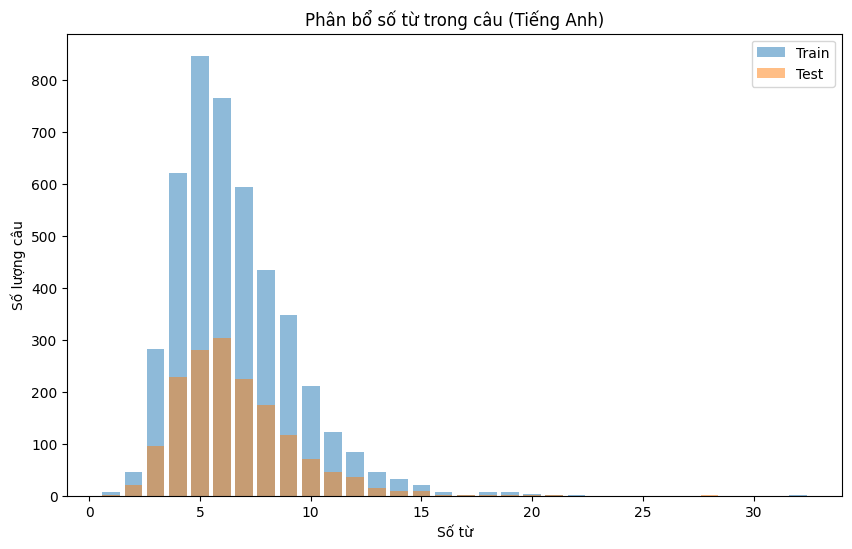

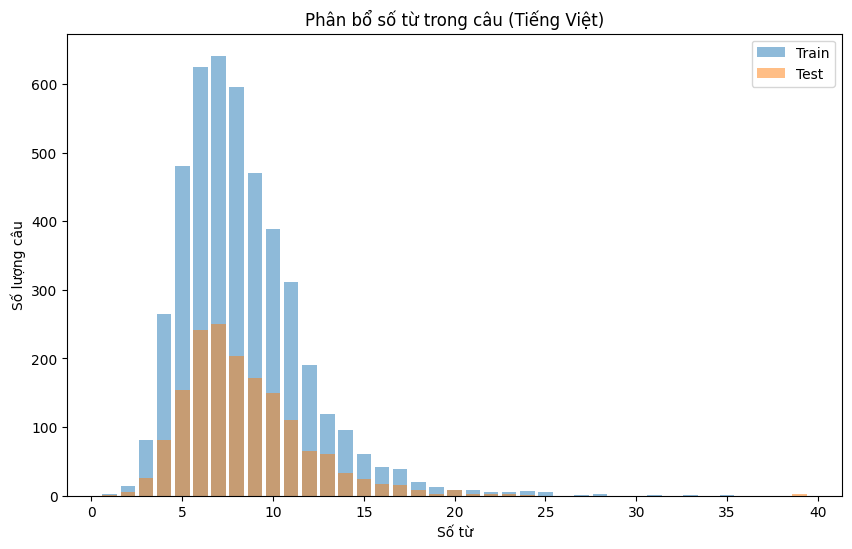

In [14]:
import pickle
import matplotlib.pyplot as plt

# Hàm để tải dữ liệu từ tệp
def load_clean_sentences(filename):
    return pickle.load(open(filename, 'rb'))

# Tải dữ liệu từ các tệp train và test
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')

# Hàm để đếm số lượng từ trong mỗi câu
def count_words(data):
    count_dict_english = {}
    count_dict_vie = {}
    for pair in data:
        english_sentence = pair[0]
        vie_sentence = pair[1]
        eng_word_count = len(english_sentence.split())
        vie_word_count = len(vie_sentence.split())
        if eng_word_count in count_dict_english:
            count_dict_english[eng_word_count] += 1
        else:
            count_dict_english[eng_word_count] = 1
        if vie_word_count in count_dict_vie:
            count_dict_vie[vie_word_count] += 1
        else:
            count_dict_vie[vie_word_count] = 1
    return count_dict_english, count_dict_vie

# Đếm số lượng từ trong các câu của tập train và test
train_count_english, train_count_vie = count_words(train)
test_count_english, test_count_vie = count_words(test)

# Vẽ biểu đồ histogram để so sánh phân bố
def plot_histogram(train_count, test_count, title):
    plt.figure(figsize=(10, 6))
    plt.bar(train_count.keys(), train_count.values(), alpha=0.5, label='Train')
    plt.bar(test_count.keys(), test_count.values(), alpha=0.5, label='Test')
    plt.xlabel('Số từ')
    plt.ylabel('Số lượng câu')
    plt.title(title)
    plt.legend()
    plt.show()

# Vẽ biểu đồ cho tiếng Anh
plot_histogram(train_count_english, test_count_english, 'Phân bổ số từ trong câu (Tiếng Anh)')

# Vẽ biểu đồ cho tiếng Việt
plot_histogram(train_count_vie, test_count_vie, 'Phân bổ số từ trong câu (Tiếng Việt)')

In [7]:
# dựa trên độ dài câu. 
# Câu tiếng Việt thường tập trung vào độ dài 6-9w/câu. đặt giả dụ câu đơn giản sẽ có độ dài <10 và câu phức tạp sẽ có độ dài >=10
# tuy vậy, với kết quả đầu ra sẽ không hoàn toàn chính xác do việc chia này không dựa hoàn toàn theo nội dung của câu

import random

def classify_sentence_by_length(sentence):
    """
    Phân loại câu dựa trên độ dài.
    Args:
        sentence (str): Câu cần phân loại.
    Returns:
        str: "Simple" nếu câu có độ dài < 7 từ, "Complex" nếu >= 7 từ.
    """
    word_count = len(sentence.split())  # Đếm số từ trong câu
    return "Simple" if word_count < 10 else "Complex"

# Đọc file dataset
file_path = "/kaggle/input/dataset/vie.txt"  # Đường dẫn file dataset
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Danh sách lưu câu đơn giản và phức tạp
simple_sentences = []
complex_sentences = []

# Phân loại và lưu vào danh sách
for line in lines:
    if "\t" in line:  # Dữ liệu có dạng: "Câu tiếng Anh \t Câu tiếng Việt"
        _, vietnamese_sentence, *_ = line.split("\t")  # Chỉ lấy câu tiếng Việt
        classification = classify_sentence_by_length(vietnamese_sentence.strip())
        if classification == "Simple":
            simple_sentences.append(vietnamese_sentence.strip())
        elif classification == "Complex":
            complex_sentences.append(vietnamese_sentence.strip())

# Chọn ngẫu nhiên 50 câu từ mỗi loại
random_simple = random.sample(simple_sentences, min(50, len(simple_sentences)))
random_complex = random.sample(complex_sentences, min(50, len(complex_sentences)))

# Hiển thị kết quả
print("50 câu đơn giản ngẫu nhiên:")
print("-" * 60)
for sentence in random_simple:
    print(sentence)

print("\n50 câu phức tạp ngẫu nhiên:")
print("-" * 60)
for sentence in random_complex:
    print(sentence)

50 câu đơn giản ngẫu nhiên:
------------------------------------------------------------
Ngày mai tôi sẽ xuất phát đến Canada.
Tôi nói là tôi không hiểu tiếng Pháp.
Tôi sắp nghỉ hưu.
Hôm nay tôi có nhiều bài tập phải làm.
Hãy đến cứu tôi!
Đếm cua trong lỗ.
Tôi thích đi xem phim.
Trên bàn có một quả dưa bở.
Mình mới biết Tom đang làm cái gì
Tom có cần giúp đỡ không?
Bố tôi đã về nhà vào lúc 9 giờ.
Chúng tôi không đi lướt ván nước nữa.
Bạn nên làm những gì họ nhờ bạn làm.
Hôm nay là ngày phát lương có đúng không?
Tớ có thể xem ti-vi cả ngày không chán.
Tớ không thể tin là anh ấy mất rồi.
Tối qua mày ngủ ở đâu?
Tim tôi tràn ngập hạnh phúc.
Đi taxi tới bến xe mất khoảng 30 phút.
Tôi đã sinh ra ở Osaka vào năm 1977.
Tom đã có tên trên danh sách.
Anh ta nợ rất nhiều tiền.
Tôi đã mượn một chiếc bàn.
Cong sông chảy giữa hai nước.
Tom không thích sữa.
Bạn có sống ở đây không?
Khác với cậu em trai, tôi không biết bơi.
Nó quản lý một cửa hàng giày.
Bạn lái ô tô không được giỏi cho lắm.
Trong phòn

In [8]:
# Định nghĩa danh sách các liên từ phụ thuộc
subordinating_conjunctions = [
    "vì", "rằng", "nếu", "khi", "mặc dù", "bởi vì", "trong khi", 
    "nhưng", "hoặc", "và", "để", "với", "dù"
]

def classify_sentence(sentence):
    """
    Phân loại câu thành câu đơn hoặc câu phức.
    Args:
        sentence (str): Câu cần phân loại.
    Returns:
        str: "Simple" nếu là câu đơn, "Complex" nếu là câu phức.
    """
    for conj in subordinating_conjunctions:
        if conj in sentence:
            return "Complex"
    return "Simple"

# Đọc file dataset
file_path = "/kaggle/input/dataset/vie.txt"  # Đường dẫn file dataset
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Phân loại từng câu trong dataset
simple_sentences = []
complex_sentences = []

for line in lines:
    if "\t" in line:  # Dữ liệu có dạng: "Câu tiếng Anh \t Câu tiếng Việt"
        _, vietnamese_sentence, *_ = line.split("\t")  # Chỉ lấy câu tiếng Việt
        classification = classify_sentence(vietnamese_sentence.strip())
        if classification == "Simple":
            simple_sentences.append(vietnamese_sentence.strip())
        elif classification == "Complex":
            complex_sentences.append(vietnamese_sentence.strip())

# Hiển thị 50 câu Simple và 50 câu Complex
print("{:<50} {:<10}".format("Câu tiếng Việt", "Phân loại"))
print("-" * 60)

print("\n50 Câu Complex:")
for sentence in complex_sentences[:50]:
    print("{:<50} {:<10}".format(sentence, "Complex"))

print("\n50 Câu Simple:")
for sentence in simple_sentences[:50]:
    print("{:<50} {:<10}".format(sentence, "Simple"))


Câu tiếng Việt                                     Phân loại 
------------------------------------------------------------

50 Câu Complex:
Giúp tôi với!                                      Complex   
Cứu tôi với!                                       Complex   
Nó vừa với tôi.                                    Complex   
Đi với tôi.                                        Complex   
Hãy để Tom đợi.                                    Complex   
Hãy để tôi mơ mộng.                                Complex   
Cái đó dùng tốt lắm.                               Complex   
Hãy để nó ở đây.                                   Complex   
Thời gian là vàng.                                 Complex   
Bạn có thể vào.                                    Complex   
Cái này tuỳ vào bạn.                               Complex   
Chúng ta hãy vào trong nào.                        Complex   
Chúng tôi đến để giúp.                             Complex   
Đừng sờ vào cái này.                               Com

In [9]:
import spacy
from collections import Counter

# Tải mô hình tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

def classify_sentence_by_dependency_v2(sentence):
    """
    Phân loại câu đơn/phức tạp dựa trên số lượng cặp chủ-vị ngữ và sự hiện diện của liên từ ('and', 'but', 'or'...).
    """
    doc = nlp(sentence)
    subject_verb_pairs = 0
    conjunctions = ["and", "but", "or", "nor", "for", "so", "yet"]

    # Đếm số lượng cặp chủ-vị ngữ
    for token in doc:
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            subject_verb_pairs += 1

    # Phân loại câu dựa trên số cặp chủ-vị ngữ và liên từ
    if subject_verb_pairs > 1:
        return "Complex", subject_verb_pairs
    for token in doc:
        if token.text.lower() in conjunctions:
            return "Complex", subject_verb_pairs

    # Nếu chỉ có một cặp chủ-vị ngữ, câu đơn
    if subject_verb_pairs == 1:
        return "Simple", subject_verb_pairs
    else:
        return "Complex", subject_verb_pairs

# Đọc bộ dữ liệu từ file
file_path = "/kaggle/input/dataset/vie.txt"  # Đảm bảo đường dẫn đúng với file của bạn

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Biến chứa câu Simple và Complex
simple_sentences = []
complex_sentences = []

# Áp dụng phân tích cú pháp và phân loại cho từng câu tiếng Anh trong file
for line in lines:
    if "\t" in line:  # Đảm bảo dòng có chứa dữ liệu (câu tiếng Anh và tiếng Việt)
        english_sentence, vietnamese_sentence, _ = line.split("\t")  # Tách câu tiếng Anh, tiếng Việt và thông tin bản quyền
        classification, subject_verb_pairs = classify_sentence_by_dependency_v2(english_sentence.strip())

        if classification == "Simple":
            simple_sentences.append((english_sentence.strip(), subject_verb_pairs))
        elif classification == "Complex":
            complex_sentences.append((english_sentence.strip(), subject_verb_pairs))

# Hiển thị 50 câu Complex và 50 câu Simple
print("{:<50} {:<10} {:<10}".format("English Sentence", "Type", "S-V Pairs"))
print("-" * 80)

print("\n50 Complex Sentences:")
for sentence, sv_pairs in complex_sentences[:50]:
    print("{:<50} {:<10} {:<10}".format(sentence, "Complex", sv_pairs))

print("\n50 Simple Sentences:")
for sentence, sv_pairs in simple_sentences[:50]:
    print("{:<50} {:<10} {:<10}".format(sentence, "Simple", sv_pairs))


English Sentence                                   Type       S-V Pairs 
--------------------------------------------------------------------------------

50 Complex Sentences:
Run!                                               Complex    0         
Help!                                              Complex    0         
Go on.                                             Complex    0         
Hello!                                             Complex    0         
Hurry!                                             Complex    0         
Eat it.                                            Complex    0         
Eat it.                                            Complex    0         
Help me!                                           Complex    0         
Perfect!                                           Complex    0         
Cheer up.                                          Complex    0         
Hurry up.                                          Complex    0         
I'm bald.           


Summary:
Total Simple Sentences: 3262
Total Complex Sentences: 2877


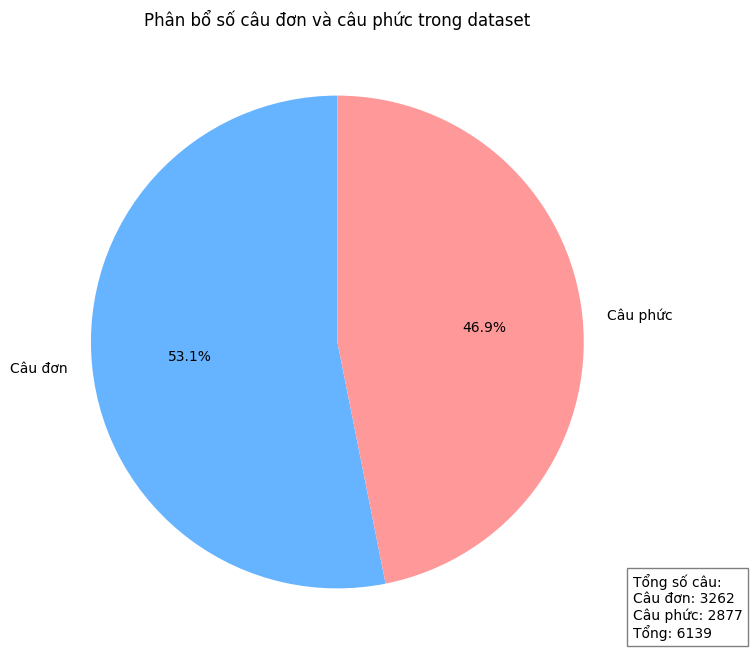

In [10]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Tải mô hình tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

def classify_sentence_by_dependency_v2(sentence):
    """
    Phân loại câu đơn/phức tạp dựa trên số lượng cặp chủ-vị ngữ và sự hiện diện của liên từ ('and', 'but', 'or'...).
    """
    doc = nlp(sentence)
    subject_verb_pairs = 0
    conjunctions = ["and", "but", "or", "nor", "for", "so", "yet"]

    # Đếm số lượng cặp chủ-vị ngữ
    for token in doc:
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            subject_verb_pairs += 1

    # Phân loại câu dựa trên số cặp chủ-vị ngữ và liên từ
    if subject_verb_pairs > 1:
        return "Complex", subject_verb_pairs
    for token in doc:
        if token.text.lower() in conjunctions:
            return "Complex", subject_verb_pairs

    # Nếu chỉ có một cặp chủ-vị ngữ, câu đơn
    if subject_verb_pairs == 1:
        return "Simple", subject_verb_pairs
    else:
        return "Complex", subject_verb_pairs

# Đọc bộ dữ liệu từ file
file_path = "/kaggle/input/dataset/vie.txt"  # Đảm bảo đường dẫn đúng với file của bạn

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Biến chứa câu Simple và Complex
simple_sentences = []
complex_sentences = []

# Áp dụng phân tích cú pháp và phân loại cho từng câu tiếng Anh trong file
for line in lines:
    if "\t" in line:  # Đảm bảo dòng có chứa dữ liệu (câu tiếng Anh và tiếng Việt)
        english_sentence, vietnamese_sentence, _ = line.split("\t")  # Tách câu tiếng Anh, tiếng Việt và thông tin bản quyền
        classification, subject_verb_pairs = classify_sentence_by_dependency_v2(english_sentence.strip())

        if classification == "Simple":
            simple_sentences.append((english_sentence.strip(), subject_verb_pairs))
        elif classification == "Complex":
            complex_sentences.append((english_sentence.strip(), subject_verb_pairs))

# Tính tổng số câu đơn và câu phức
total_simple = len(simple_sentences)
total_complex = len(complex_sentences)
total_sentences = total_simple + total_complex

print("\nSummary:")
print(f"Total Simple Sentences: {total_simple}")
print(f"Total Complex Sentences: {total_complex}")

# Hiển thị biểu đồ tròn (Pie Chart)
labels = ["Câu đơn", "Câu phức"]
sizes = [total_simple, total_complex]
colors = ["#66b3ff", "#ff9999"]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Thêm chú thích tổng số câu vào góc dưới bên phải của biểu đồ
plt.text(1.2, -1.2, f"Tổng số câu:\nCâu đơn: {total_simple}\nCâu phức: {total_complex}\nTổng: {total_sentences}", 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.5))

plt.title("Phân bổ số câu đơn và câu phức trong dataset")
plt.show()


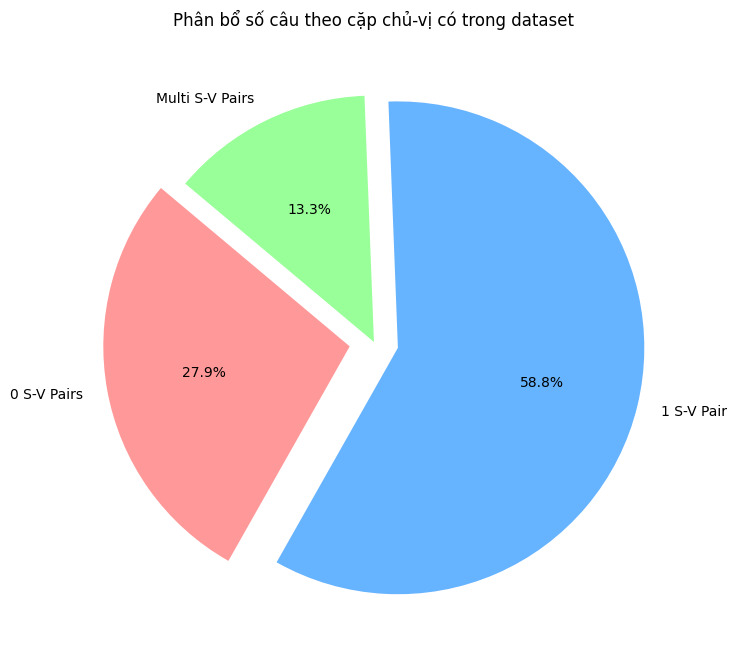

In [9]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Tải mô hình tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

def classify_sentence_by_dependency_v2(sentence):
    """
    Phân loại câu đơn/phức tạp dựa trên số lượng cặp chủ-vị ngữ và sự hiện diện của liên từ ('and', 'but', 'or'...).
    """
    doc = nlp(sentence)
    subject_verb_pairs = 0
    conjunctions = ["and", "but", "or", "nor", "for", "so", "yet"]

    # Đếm số lượng cặp chủ-vị ngữ
    for token in doc:
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            subject_verb_pairs += 1

    # Phân loại câu dựa trên số cặp chủ-vị ngữ và liên từ
    if subject_verb_pairs > 1:
        return "Complex", subject_verb_pairs
    for token in doc:
        if token.text.lower() in conjunctions:
            return "Complex", subject_verb_pairs

    # Nếu chỉ có một cặp chủ-vị ngữ, câu đơn
    if subject_verb_pairs == 1:
        return "Simple", subject_verb_pairs
    else:
        return "Complex", subject_verb_pairs

# Đọc bộ dữ liệu từ file
file_path = "/kaggle/input/dataset/vie.txt"  # Đảm bảo đường dẫn đúng với file của bạn

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Thống kê số cặp chủ-vị trong các câu
pair_count_stats = Counter()

# Áp dụng phân tích cú pháp và phân loại cho từng câu tiếng Anh trong file
for line in lines:
    if "\t" in line:  # Đảm bảo dòng có chứa dữ liệu (câu tiếng Anh và tiếng Việt)
        english_sentence, vietnamese_sentence, _ = line.split("\t")  # Tách câu tiếng Anh, tiếng Việt và thông tin bản quyền
        _, subject_verb_pairs = classify_sentence_by_dependency_v2(english_sentence.strip())
        pair_count_stats[subject_verb_pairs] += 1

# Tính phần trăm cho mỗi loại
total_sentences = sum(pair_count_stats.values())
percentages = {
    "0 S-V Pairs": (pair_count_stats[0] / total_sentences) * 100,
    "1 S-V Pair": (pair_count_stats[1] / total_sentences) * 100,
    "Multi S-V Pairs": (sum(count for pair, count in pair_count_stats.items() if pair > 1) / total_sentences) * 100
}

# Vẽ biểu đồ tròn
labels = list(percentages.keys())
sizes = list(percentages.values())
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0)  # Tách nhẹ 2 loại đầu ra khỏi biểu đồ

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Phân bổ số câu theo cặp chủ-vị có trong dataset')
plt.show()


In [7]:
from pickle import load
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# one hot encode target sequence.
def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y

# define NMT model
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
	model.add(LSTM(n_units))
	model.add(RepeatVector(tar_timesteps))
	model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

# load datasets
dataset = load_clean_sentences('english-vie-both.pkl')
train = load_clean_sentences('english-vie-train.pkl')
test = load_clean_sentences('english-vie-test.pkl')

eng_tokenizer = create_tokenizer(dataset[:,0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))

vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
print('Vietnam Vocabulary Size: %d' % vie_vocab_size)
print('Vietnam Max Length: %d' % (vie_length))
# prepare training data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)
# prepare validation data
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)
# define model
model = define_model(vie_vocab_size, eng_vocab_size, vie_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.build(input_shape=(None, vie_length))
# summarize defined model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)
# fit model
filename = 'model.keras'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)

English Vocabulary Size: 3459
English Max Length: 32
Vietnam Vocabulary Size: 2230
Vietnam Max Length: 39


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 39, 256)        │       570,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 32, 3459)       │       888,963 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,510,467 (9.58 MB)

 Trainable params: 2,510,467 (9.58 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50

Epoch 1: val_loss improved from inf to 1.49918, saving model to model.keras
71/71 - 47s - 656ms/step - loss: 2.5523 - val_loss: 1.4992
Epoch 2/50

Epoch 2: val_loss improved from 1.49918 to 1.43520, saving model to model.keras
71/71 - 39s - 543ms/step - loss: 1.4437 - val_loss: 1.4352
Epoch 3/50

Epoch 3: val_loss improved from 1.43520 to 1.40768, saving model to model.keras
71/71 - 36s - 509ms/step - loss: 1.3890 - val_loss: 1.4077
Epoch 4/50

Epoch 4: val_loss improved from 1.40768 to 1.39761, saving model to model.keras
71/71 - 36s - 509ms/step - loss: 1.3542 - val_loss: 1.3976
Epoch 5/50

Epoch 5: val_loss improved from 1.39761 to 1.37891, saving model to model.keras
71/71 - 35s - 494ms/step - loss: 1.3400 - val_loss: 1.3789
Epoch 6/50

Epoch 6: val_loss improved from 1.37891 to 1.37235, saving model to model.keras
71/71 - 34s - 483ms/step - loss: 1.3176 - val_loss: 1.3723
Epoch 7/50

Epoch 7: val_loss did not improve from 1.37235
71/71 - 34s - 477ms/step - loss: 1

In [5]:
from pickle import load
from numpy import array
from numpy import argmax
from numpy.random import choice
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset, num_samples=10):
	actual, predicted = list(), list()
	# Lấy ngẫu nhiên num_samples câu
	indices = choice(len(sources), size=num_samples, replace=False)
	for i in indices:
		# translate encoded source text
		source = sources[i].reshape((1, sources[i].shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src, _ = raw_dataset[i]
		print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('/kaggle/input/dataset/english-vie-both.pkl')
train = load_clean_sentences('/kaggle/input/dataset/english-vie-train.pkl')
test = load_clean_sentences('/kaggle/input/dataset/english-vie-test.pkl')

eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])

vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('/kaggle/input/dataset/model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train, num_samples=100)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test, num_samples=100)


train
src=[ai đã nói cho bạn biết tin cô ấy đã chết], target=[who broke the news of her death to you], predicted=[she ill that he he book]
src=[chúng ta nên trông đợi điều gì], target=[what should we expect], predicted=[lets were met]
src=[bây giờ là mấy giờ rồi], target=[whats the time now], predicted=[she is youd]
src=[mình mới biết tom đang làm cái gì], target=[ive found out what tom is doing], predicted=[i didnt tom what what do]
src=[tom nói với tôi là anh ấy muốn đi boston], target=[tom told me that he wanted to go to boston], predicted=[tom some mary that that to to to]
src=[chúng ta cần cả hai], target=[we need both], predicted=[we night to to tom]
src=[chúng ta hãy cùng thảo luận vấn đề ở đây], target=[lets discuss the matter here], predicted=[lets lets in by here]
src=[bạn đã bao giờ trốn học chưa], target=[have you ever skipped school], predicted=[are you a much]
src=[vì quá ngạc nhiên tôi đã không thể nói nên lời], target=[i was too surprised to speak], predicted=[i didnt t

/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


src=[sở thích của tôi là đọc sách], target=[my hobby is reading], predicted=[you you a a much]
src=[hôm qua bạn muốn nói gì với tôi vậy], target=[what did you want to say to me yesterday], predicted=[you you you you to to to me]
src=[tôi không thể làm xong công việc đó trong một giờ], target=[it is impossible for me to finish the work in an hour], predicted=[i dont know to to to to the you]
src=[ai đã dạy bạn chơi piano vậy], target=[who taught you the piano], predicted=[how you a a]
src=[thiếu một cái nĩa], target=[there is a fork missing], predicted=[you lot a pours]
src=[bây giờ tôi cảm thấy muốn khóc], target=[i feel like crying now], predicted=[i dont i you to to]
src=[tom đã rất hoảng sợ], target=[tom was frightened], predicted=[tom was a]
src=[tôi cần thêm], target=[i need more], predicted=[i like]
src=[sắp vô tiết rồi], target=[classes are starting again soon], predicted=[lets time]
src=[ông già ngồi xuống], target=[the old man sat down], predicted=[tom is very annoys]
src=[tom

In [6]:
from pickle import load
from numpy import array
from numpy import argmax
from numpy.random import choice
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset, num_samples=10):
	actual, predicted = list(), list()
	# Lấy ngẫu nhiên num_samples câu
	indices = choice(len(sources), size=num_samples, replace=False)
	for i in indices:
		# translate encoded source text
		source = sources[i].reshape((1, sources[i].shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src, _ = raw_dataset[i]
		print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('/kaggle/input/dataset/english-vie-both.pkl')
train = load_clean_sentences('/kaggle/input/dataset/english-vie-train.pkl')
test = load_clean_sentences('/kaggle/input/dataset/english-vie-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('/kaggle/input/dataset/model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train, num_samples=100)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test, num_samples=100)


train
src=[không đùa chứ], target=[no kidding], predicted=[the is is early]
src=[tôi đã nhặt con mèo lên], target=[i picked up the cat], predicted=[i umbrella to an family]
src=[ở đó bây giờ là mấy giờ], target=[what time is it there now], predicted=[does it it it here here]
src=[tom chắc chắn sẽ thắng], target=[tom ought to win], predicted=[tom ill to to the than]
src=[xin lỗi tôi thực sự chỉ nhớ có thế này thôi], target=[im sorry thats really all i remember], predicted=[the all the the all all with all]
src=[buổi hoà nhạc kéo dài tiếng đồng hồ], target=[the concert lasted about three hours], predicted=[why are young with the the the]
src=[hôm nay tôi sẽ không đến], target=[i wont come today], predicted=[im have have to today today]
src=[ít nhất bạn cũng phải cho tôi biết bạn định đi đâu], target=[at least tell me where youre going], predicted=[what are you you i i i i i]
src=[tôi đọc được], target=[i can read], predicted=[i like to]
src=[bọn tớ chả ăn đồ ăn này bao giờ], target=[were

/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [19]:
from pickle import load
from numpy import array
from numpy import argmax
from numpy.random import choice
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset, num_samples=10):
	actual, predicted = list(), list()
	# Lấy ngẫu nhiên num_samples câu
	indices = choice(len(sources), size=num_samples, replace=False)
	for i in indices:
		# translate encoded source text
		source = sources[i].reshape((1, sources[i].shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src, _ = raw_dataset[i]
		print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('/kaggle/input/dataset/english-vie-both.pkl')
train = load_clean_sentences('/kaggle/input/dataset/english-vie-train.pkl')
test = load_clean_sentences('/kaggle/input/dataset/english-vie-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('/kaggle/input/dataset/model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train, num_samples=100)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test, num_samples=100)


train
src=[bạn hãy thử thái miếng thịt bằng một con dao khác đi], target=[try to slice the meat with a different knife], predicted=[we are a the the the the the the the]
src=[trong túi này có gì vậy], target=[whats in this bag], predicted=[family your]
src=[em vẫn muốn ở bên anh], target=[i still want to be with you], predicted=[i want to to to]
src=[nó lùn nhưng rất giỏi môn bóng rổ], target=[he is short but good at basketball], predicted=[this is the the the the the the the]
src=[anh muốn mua gì], target=[what would you like to buy], predicted=[i never to to to]
src=[cuốn sách đã sẵn sàng để xuất bản rồi], target=[the book is now ready for publication], predicted=[the more the the time time to the the]
src=[hãy ăn mừng kỷ niệm ngày chúng ta hôn nhau lần đầu], target=[lets celebrate the anniversary of our first kiss], predicted=[there are the the the the the the]
src=[tôi đã không biết về chuyện đó cho tới khi tôi đọc báo], target=[i didnt know about it until i read the paper], predic

In [20]:
from pickle import load
from numpy import array
from numpy import argmax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

# evaluate the skill of the model
def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src,test = raw_dataset[i]
		if i < 100:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# load datasets
dataset = load_clean_sentences('/kaggle/input/dataset/english-vie-both.pkl')
train = load_clean_sentences('/kaggle/input/dataset/english-vie-train.pkl')
test = load_clean_sentences('/kaggle/input/dataset/english-vie-test.pkl')
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
# prepare german tokenizer
vie_tokenizer = create_tokenizer(dataset[:, 1])
vie_vocab_size = len(vie_tokenizer.word_index) + 1
vie_length = max_length(dataset[:, 1])
# prepare data
trainX = encode_sequences(vie_tokenizer, vie_length, train[:, 1])
testX = encode_sequences(vie_tokenizer, vie_length, test[:, 1])

# load model
model = load_model('/kaggle/input/dataset/model.keras')
# test on some training sequences
print('train')
evaluate_model(model, eng_tokenizer, trainX, train)
# test on some test sequences
print('test')
evaluate_model(model, eng_tokenizer, testX, test)

train
src=[của rẻ là của ôi], target=[buy cheap and waste your money], predicted=[the is is material]
src=[tôi mong là tom sẽ không muốn làm việc đó], target=[i hope tom wont want to do that], predicted=[i think tom tom to do do do that]
src=[nó có thể nổ], target=[it might explode], predicted=[he learn wasnt wasnt]
src=[bạn không phải là một thợ máy nhỉ], target=[you arent a mechanic are you], predicted=[you you you to to a]
src=[tom nghĩ là mary có lẽ đã không làm điều đó], target=[tom thinks mary probably didnt do that], predicted=[tom ill mary mary mary do do that that]
src=[chúc hai bạn hạnh phúc trọn đời], target=[i wish you both a lifetime of happiness], predicted=[i id a very]
src=[bộ phim bắt đầu lúc giờ], target=[the movie starts at ten oclock], predicted=[tom is doesnt doesnt doesnt anyone anyone]
src=[cả tom và tôi đều đã say], target=[tom and i were both drunk], predicted=[tom and tom tom every stop]
src=[tôi muốn nước trái cây], target=[i would like fruit juice], predicte

In [14]:
from pickle import load 
from tensorflow.keras.models import load_model 
import numpy as np 
model = load_model('/kaggle/input/dataset/model.keras') 
random_sentence = ['Mai ở nhà.','Văn võ song toàn.','Mày ngu lắm con.']
for _ in random_sentence:
    encoded_sentence = encode_sequences(vie_tokenizer, max_length([_]), [_]) 
    translation = predict_sequence(model, eng_tokenizer, encoded_sentence) 
    print(_ + ' -> ' + translation)

Mai ở nhà. -> its is
Văn võ song toàn. -> the is
Mày ngu lắm con. -> youre you a upset


In [23]:
import random

# Kiểm tra mô hình với 3 câu tiếng Việt mẫu
# Danh sách các câu tiếng Việt để kiểm tra
all_sentences = [
    "Tôi yêu học máy tính.",
    "Bạn đang ở đâu?",
    "Hôm nay thời tiết rất đẹp.",
    "Tôi thích ăn phở.",
    "Chúng ta nên làm gì tiếp theo?",
    "Cuộc sống thật thú vị.",
    "Tôi đang học cách lập trình.",
    "Mùa hè này rất nóng.",
    "Tôi muốn đi du lịch.",
    "Bạn có thể giúp tôi không?"
]

# Chọn ngẫu nhiên 3 câu từ danh sách
sample_sentences = random.sample(all_sentences, 3)

# Xử lý các câu mẫu
sampleX = encode_sequences(vie_tokenizer, vie_length, sample_sentences)

# Dự đoán và in kết quả
actual, predicted = list(), list()
for i, sentence in enumerate(sample_sentences):
    source = sampleX[i].reshape((1, sampleX[i].shape[0]))
    prediction = predict_sequence(model, eng_tokenizer, source)
    print(f"Câu gốc: {sentence}")
    print(f"Dự đoán: {prediction}\n")
    actual.append([sentence.split()])
    predicted.append(prediction.split())

# Tính điểm BLEU
print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

Câu gốc: Tôi đang học cách lập trình.
Dự đoán: i had to to the the the

Câu gốc: Bạn có thể giúp tôi không?
Dự đoán: do you you to

Câu gốc: Bạn đang ở đâu?
Dự đoán: you you you

BLEU-1: 0.000000
BLEU-2: 0.000000
BLEU-3: 0.000000
BLEU-4: 0.000000
